In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load the data into a pandas DataFrame
data = pd.read_csv("Problem1.csv")
data


,Unnamed: 0,A,B,C,D,E,F,G,Result
0,1,0,0,1,1,0,1,1,False
1,2,1,1,0,1,0,1,1,False
2,3,1,0,1,1,1,1,0,False
3,4,0,0,0,1,0,0,1,False
4,5,1,0,1,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...
95,96,0,1,0,1,0,1,0,False
96,97,1,0,1,0,0,0,0,False
97,98,0,1,0,1,1,0,0,False
98,99,0,1,0,0,1,1,0,False


In [3]:
    #don't take key column
    data = data[data.columns[1:9]]
    data.head()

,A,B,C,D,E,F,G,Result
0,0,0,1,1,0,1,1,False
1,1,1,0,1,0,1,1,False
2,1,0,1,1,1,1,0,False
3,0,0,0,1,0,0,1,False
4,1,0,1,1,0,0,0,False


In [4]:
# Convert categorical values to numerical values
# true to 1
# false to 0
data["Result"] = data["Result"].apply(lambda x: 1 if x == True else 0)
data["Result"]

C:\Users\Lalitha_Local\AppData\Local\Temp\ipykernel_17272\4194856572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Result"] = data["Result"].apply(lambda x: 1 if x == True else 0)


0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Result, Length: 100, dtype: int64

# TEST1

In [5]:
#BEST MODEL WITH 100%

#80% of train into 2 splits -> one for the main set, second one for result column label
#20% test -> one for the main set, second one for result column label

train_data, train_labels, test_data, test_labels = train_test_split(data[data.columns[0:7]],data[data.columns[7]] , test_size=0.2, random_state=42)


In [6]:
train_data

,A,B,C,D,E,F,G
55,1,0,1,0,1,1,1
88,0,0,0,0,0,1,1
26,1,0,0,1,0,0,0
42,1,1,1,0,0,0,0
69,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...
60,0,1,0,1,1,1,0
71,0,0,0,1,1,1,0
14,1,0,0,0,0,1,0
92,0,0,1,1,0,0,0


In [7]:
train_labels

55    0
88    0
26    0
42    0
69    0
     ..
60    0
71    0
14    0
92    0
51    0
Name: Result, Length: 80, dtype: int64

In [8]:
    #create neural network model
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    #7columns so shape 7
    model.add(Dense(32, input_shape=(7,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display the model
    model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [14]:
#train_data, test_data, train_labels, test_labels
#iteration over training data
#verbose = to display results in this format

#fit the model with train data
model.fit(train_data,train_labels, epochs=5000, batch_size = 10)

Epoch 1/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 1.0000
Epoch 2/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 3/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 1.0000
Epoch 4/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 5/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 1.0000
Epoch 6/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 7/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 1.0000
Epoch 8/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 9/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 10/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 11/5000
8/8 [

8/8 [==============================] - 0s 3ms/step - loss: 5.7963e-04 - accuracy: 1.0000
Epoch 164/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.7167e-04 - accuracy: 1.0000
Epoch 165/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.7028e-04 - accuracy: 1.0000
Epoch 166/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.5776e-04 - accuracy: 1.0000
Epoch 167/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5211e-04 - accuracy: 1.0000
Epoch 168/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.4514e-04 - accuracy: 1.0000
Epoch 169/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.3911e-04 - accuracy: 1.0000
Epoch 170/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.3161e-04 - accuracy: 1.0000
Epoch 171/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.2497e-04 - accuracy: 1.0000
Epoch 172/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.210

8/8 [==============================] - 0s 3ms/step - loss: 1.3105e-04 - accuracy: 1.0000
Epoch 320/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2992e-04 - accuracy: 1.0000
Epoch 321/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.2896e-04 - accuracy: 1.0000
Epoch 322/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.2800e-04 - accuracy: 1.0000
Epoch 323/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2698e-04 - accuracy: 1.0000
Epoch 324/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2607e-04 - accuracy: 1.0000
Epoch 325/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2538e-04 - accuracy: 1.0000
Epoch 326/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2425e-04 - accuracy: 1.0000
Epoch 327/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.2330e-04 - accuracy: 1.0000
Epoch 328/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.226

8/8 [==============================] - 0s 3ms/step - loss: 4.5747e-05 - accuracy: 1.0000
Epoch 476/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.5465e-05 - accuracy: 1.0000
Epoch 477/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.5201e-05 - accuracy: 1.0000
Epoch 478/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.4911e-05 - accuracy: 1.0000
Epoch 479/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.4600e-05 - accuracy: 1.0000
Epoch 480/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.4382e-05 - accuracy: 1.0000
Epoch 481/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.4079e-05 - accuracy: 1.0000
Epoch 482/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.3841e-05 - accuracy: 1.0000
Epoch 483/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.3578e-05 - accuracy: 1.0000
Epoch 484/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.340

8/8 [==============================] - 0s 3ms/step - loss: 1.8512e-05 - accuracy: 1.0000
Epoch 632/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.8403e-05 - accuracy: 1.0000
Epoch 633/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.8291e-05 - accuracy: 1.0000
Epoch 634/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.8240e-05 - accuracy: 1.0000
Epoch 635/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.8084e-05 - accuracy: 1.0000
Epoch 636/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.8054e-05 - accuracy: 1.0000
Epoch 637/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.7903e-05 - accuracy: 1.0000
Epoch 638/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.7791e-05 - accuracy: 1.0000
Epoch 639/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7689e-05 - accuracy: 1.0000
Epoch 640/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.760

8/8 [==============================] - 0s 2ms/step - loss: 8.1384e-06 - accuracy: 1.0000
Epoch 788/5000
8/8 [==============================] - 0s 3ms/step - loss: 8.1010e-06 - accuracy: 1.0000
Epoch 789/5000
8/8 [==============================] - 0s 3ms/step - loss: 8.0473e-06 - accuracy: 1.0000
Epoch 790/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.0155e-06 - accuracy: 1.0000
Epoch 791/5000
8/8 [==============================] - 0s 3ms/step - loss: 7.9738e-06 - accuracy: 1.0000
Epoch 792/5000
8/8 [==============================] - 0s 3ms/step - loss: 7.9292e-06 - accuracy: 1.0000
Epoch 793/5000
8/8 [==============================] - 0s 3ms/step - loss: 7.8946e-06 - accuracy: 1.0000
Epoch 794/5000
8/8 [==============================] - 0s 3ms/step - loss: 7.8561e-06 - accuracy: 1.0000
Epoch 795/5000
8/8 [==============================] - 0s 3ms/step - loss: 7.8212e-06 - accuracy: 1.0000
Epoch 796/5000
8/8 [==============================] - 0s 2ms/step - loss: 7.775

8/8 [==============================] - 0s 3ms/step - loss: 3.7805e-06 - accuracy: 1.0000
Epoch 944/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.7592e-06 - accuracy: 1.0000
Epoch 945/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.7381e-06 - accuracy: 1.0000
Epoch 946/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.7201e-06 - accuracy: 1.0000
Epoch 947/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.7053e-06 - accuracy: 1.0000
Epoch 948/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.6895e-06 - accuracy: 1.0000
Epoch 949/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.6743e-06 - accuracy: 1.0000
Epoch 950/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.6506e-06 - accuracy: 1.0000
Epoch 951/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.6378e-06 - accuracy: 1.0000
Epoch 952/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.616

8/8 [==============================] - 0s 2ms/step - loss: 1.8126e-06 - accuracy: 1.0000
Epoch 1100/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.8039e-06 - accuracy: 1.0000
Epoch 1101/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7955e-06 - accuracy: 1.0000
Epoch 1102/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.7875e-06 - accuracy: 1.0000
Epoch 1103/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.7788e-06 - accuracy: 1.0000
Epoch 1104/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7698e-06 - accuracy: 1.0000
Epoch 1105/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7619e-06 - accuracy: 1.0000
Epoch 1106/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7534e-06 - accuracy: 1.0000
Epoch 1107/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.7458e-06 - accuracy: 1.0000
Epoch 1108/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 8.8434e-07 - accuracy: 1.0000
Epoch 1256/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.7961e-07 - accuracy: 1.0000
Epoch 1257/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.7593e-07 - accuracy: 1.0000
Epoch 1258/5000
8/8 [==============================] - 0s 3ms/step - loss: 8.7274e-07 - accuracy: 1.0000
Epoch 1259/5000
8/8 [==============================] - 0s 3ms/step - loss: 8.6868e-07 - accuracy: 1.0000
Epoch 1260/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.6399e-07 - accuracy: 1.0000
Epoch 1261/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.5999e-07 - accuracy: 1.0000
Epoch 1262/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.5630e-07 - accuracy: 1.0000
Epoch 1263/5000
8/8 [==============================] - 0s 2ms/step - loss: 8.5273e-07 - accuracy: 1.0000
Epoch 1264/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 4.3652e-07 - accuracy: 1.0000
Epoch 1412/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.3434e-07 - accuracy: 1.0000
Epoch 1413/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.3219e-07 - accuracy: 1.0000
Epoch 1414/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.3070e-07 - accuracy: 1.0000
Epoch 1415/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2895e-07 - accuracy: 1.0000
Epoch 1416/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2700e-07 - accuracy: 1.0000
Epoch 1417/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2483e-07 - accuracy: 1.0000
Epoch 1418/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2261e-07 - accuracy: 1.0000
Epoch 1419/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.2108e-07 - accuracy: 1.0000
Epoch 1420/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 2.1779e-07 - accuracy: 1.0000
Epoch 1568/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.1673e-07 - accuracy: 1.0000
Epoch 1569/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.1580e-07 - accuracy: 1.0000
Epoch 1570/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.1494e-07 - accuracy: 1.0000
Epoch 1571/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.1393e-07 - accuracy: 1.0000
Epoch 1572/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.1309e-07 - accuracy: 1.0000
Epoch 1573/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.1204e-07 - accuracy: 1.0000
Epoch 1574/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.1115e-07 - accuracy: 1.0000
Epoch 1575/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.1059e-07 - accuracy: 1.0000
Epoch 1576/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 1.0951e-07 - accuracy: 1.0000
Epoch 1724/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0900e-07 - accuracy: 1.0000
Epoch 1725/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0860e-07 - accuracy: 1.0000
Epoch 1726/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0803e-07 - accuracy: 1.0000
Epoch 1727/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0764e-07 - accuracy: 1.0000
Epoch 1728/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0722e-07 - accuracy: 1.0000
Epoch 1729/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0669e-07 - accuracy: 1.0000
Epoch 1730/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.0621e-07 - accuracy: 1.0000
Epoch 1731/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.0570e-07 - accuracy: 1.0000
Epoch 1732/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 5.6332e-08 - accuracy: 1.0000
Epoch 1880/5000
8/8 [==============================] - 0s 4ms/step - loss: 5.6119e-08 - accuracy: 1.0000
Epoch 1881/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5888e-08 - accuracy: 1.0000
Epoch 1882/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5644e-08 - accuracy: 1.0000
Epoch 1883/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5403e-08 - accuracy: 1.0000
Epoch 1884/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5202e-08 - accuracy: 1.0000
Epoch 1885/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.5016e-08 - accuracy: 1.0000
Epoch 1886/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.4703e-08 - accuracy: 1.0000
Epoch 1887/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.4516e-08 - accuracy: 1.0000
Epoch 1888/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 2.9466e-08 - accuracy: 1.0000
Epoch 2036/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.9324e-08 - accuracy: 1.0000
Epoch 2037/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.9227e-08 - accuracy: 1.0000
Epoch 2038/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.9113e-08 - accuracy: 1.0000
Epoch 2039/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.8975e-08 - accuracy: 1.0000
Epoch 2040/5000
8/8 [==============================] - 0s 3ms/step - loss: 2.8848e-08 - accuracy: 1.0000
Epoch 2041/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.8752e-08 - accuracy: 1.0000
Epoch 2042/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.8621e-08 - accuracy: 1.0000
Epoch 2043/5000
8/8 [==============================] - 0s 2ms/step - loss: 2.8507e-08 - accuracy: 1.0000
Epoch 2044/5000
8/8 [==============================] - 0s 1ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 1.5768e-08 - accuracy: 1.0000
Epoch 2192/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5710e-08 - accuracy: 1.0000
Epoch 2193/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5649e-08 - accuracy: 1.0000
Epoch 2194/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5604e-08 - accuracy: 1.0000
Epoch 2195/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5536e-08 - accuracy: 1.0000
Epoch 2196/5000
8/8 [==============================] - 0s 3ms/step - loss: 1.5467e-08 - accuracy: 1.0000
Epoch 2197/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5413e-08 - accuracy: 1.0000
Epoch 2198/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5357e-08 - accuracy: 1.0000
Epoch 2199/5000
8/8 [==============================] - 0s 2ms/step - loss: 1.5306e-08 - accuracy: 1.0000
Epoch 2200/5000
8/8 [==============================] - 0s 1ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 9.5414e-09 - accuracy: 1.0000
Epoch 2348/5000
8/8 [==============================] - 0s 2ms/step - loss: 9.5683e-09 - accuracy: 1.0000
Epoch 2349/5000
8/8 [==============================] - 0s 1ms/step - loss: 9.5169e-09 - accuracy: 1.0000
Epoch 2350/5000
8/8 [==============================] - 0s 3ms/step - loss: 9.4561e-09 - accuracy: 1.0000
Epoch 2351/5000
8/8 [==============================] - 0s 3ms/step - loss: 9.4313e-09 - accuracy: 1.0000
Epoch 2352/5000
8/8 [==============================] - 0s 2ms/step - loss: 9.4179e-09 - accuracy: 1.0000
Epoch 2353/5000
8/8 [==============================] - 0s 2ms/step - loss: 9.4130e-09 - accuracy: 1.0000
Epoch 2354/5000
8/8 [==============================] - 0s 3ms/step - loss: 9.4125e-09 - accuracy: 1.0000
Epoch 2355/5000
8/8 [==============================] - 0s 2ms/step - loss: 9.3715e-09 - accuracy: 1.0000
Epoch 2356/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 6.0460e-09 - accuracy: 1.0000
Epoch 2504/5000
8/8 [==============================] - 0s 3ms/step - loss: 6.0300e-09 - accuracy: 1.0000
Epoch 2505/5000
8/8 [==============================] - 0s 2ms/step - loss: 6.0062e-09 - accuracy: 1.0000
Epoch 2506/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.9588e-09 - accuracy: 1.0000
Epoch 2507/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.9325e-09 - accuracy: 1.0000
Epoch 2508/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.9214e-09 - accuracy: 1.0000
Epoch 2509/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.9105e-09 - accuracy: 1.0000
Epoch 2510/5000
8/8 [==============================] - 0s 3ms/step - loss: 5.9012e-09 - accuracy: 1.0000
Epoch 2511/5000
8/8 [==============================] - 0s 2ms/step - loss: 5.8866e-09 - accuracy: 1.0000
Epoch 2512/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 4.3294e-09 - accuracy: 1.0000
Epoch 2660/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.3725e-09 - accuracy: 1.0000
Epoch 2661/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.2697e-09 - accuracy: 1.0000
Epoch 2662/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2443e-09 - accuracy: 1.0000
Epoch 2663/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2575e-09 - accuracy: 1.0000
Epoch 2664/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2573e-09 - accuracy: 1.0000
Epoch 2665/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2654e-09 - accuracy: 1.0000
Epoch 2666/5000
8/8 [==============================] - 0s 2ms/step - loss: 4.2823e-09 - accuracy: 1.0000
Epoch 2667/5000
8/8 [==============================] - 0s 3ms/step - loss: 4.3203e-09 - accuracy: 1.0000
Epoch 2668/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.8470e-09 - accuracy: 1.0000
Epoch 2816/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.8529e-09 - accuracy: 1.0000
Epoch 2817/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.8879e-09 - accuracy: 1.0000
Epoch 2818/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.9294e-09 - accuracy: 1.0000
Epoch 2819/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.8510e-09 - accuracy: 1.0000
Epoch 2820/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.8089e-09 - accuracy: 1.0000
Epoch 2821/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.8026e-09 - accuracy: 1.0000
Epoch 2822/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.7774e-09 - accuracy: 1.0000
Epoch 2823/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.7791e-09 - accuracy: 1.0000
Epoch 2824/5000
8/8 [==============================] - 0s 4ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.6329e-09 - accuracy: 1.0000
Epoch 2972/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.6622e-09 - accuracy: 1.0000
Epoch 2973/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.6998e-09 - accuracy: 1.0000
Epoch 2974/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.7365e-09 - accuracy: 1.0000
Epoch 2975/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.6823e-09 - accuracy: 1.0000
Epoch 2976/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.6968e-09 - accuracy: 1.0000
Epoch 2977/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.7446e-09 - accuracy: 1.0000
Epoch 2978/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.7517e-09 - accuracy: 1.0000
Epoch 2979/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.6941e-09 - accuracy: 1.0000
Epoch 2980/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.4174e-09 - accuracy: 1.0000
Epoch 3128/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4576e-09 - accuracy: 1.0000
Epoch 3129/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.5151e-09 - accuracy: 1.0000
Epoch 3130/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.5377e-09 - accuracy: 1.0000
Epoch 3131/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3759e-09 - accuracy: 1.0000
Epoch 3132/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3479e-09 - accuracy: 1.0000
Epoch 3133/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3520e-09 - accuracy: 1.0000
Epoch 3134/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3884e-09 - accuracy: 1.0000
Epoch 3135/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4203e-09 - accuracy: 1.0000
Epoch 3136/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.3161e-09 - accuracy: 1.0000
Epoch 3284/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3556e-09 - accuracy: 1.0000
Epoch 3285/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3921e-09 - accuracy: 1.0000
Epoch 3286/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4285e-09 - accuracy: 1.0000
Epoch 3287/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4722e-09 - accuracy: 1.0000
Epoch 3288/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4950e-09 - accuracy: 1.0000
Epoch 3289/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.4087e-09 - accuracy: 1.0000
Epoch 3290/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3795e-09 - accuracy: 1.0000
Epoch 3291/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3902e-09 - accuracy: 1.0000
Epoch 3292/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.4926e-09 - accuracy: 1.0000
Epoch 3440/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.5274e-09 - accuracy: 1.0000
Epoch 3441/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4250e-09 - accuracy: 1.0000
Epoch 3442/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3492e-09 - accuracy: 1.0000
Epoch 3443/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3306e-09 - accuracy: 1.0000
Epoch 3444/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.3442e-09 - accuracy: 1.0000
Epoch 3445/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3680e-09 - accuracy: 1.0000
Epoch 3446/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3913e-09 - accuracy: 1.0000
Epoch 3447/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4265e-09 - accuracy: 1.0000
Epoch 3448/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.3782e-09 - accuracy: 1.0000
Epoch 3596/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4051e-09 - accuracy: 1.0000
Epoch 3597/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4007e-09 - accuracy: 1.0000
Epoch 3598/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2900e-09 - accuracy: 1.0000
Epoch 3599/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.2645e-09 - accuracy: 1.0000
Epoch 3600/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2701e-09 - accuracy: 1.0000
Epoch 3601/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2955e-09 - accuracy: 1.0000
Epoch 3602/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3147e-09 - accuracy: 1.0000
Epoch 3603/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3420e-09 - accuracy: 1.0000
Epoch 3604/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.5557e-09 - accuracy: 1.0000
Epoch 3752/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.5766e-09 - accuracy: 1.0000
Epoch 3753/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4654e-09 - accuracy: 1.0000
Epoch 3754/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4204e-09 - accuracy: 1.0000
Epoch 3755/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4076e-09 - accuracy: 1.0000
Epoch 3756/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.4155e-09 - accuracy: 1.0000
Epoch 3757/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4329e-09 - accuracy: 1.0000
Epoch 3758/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4571e-09 - accuracy: 1.0000
Epoch 3759/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4760e-09 - accuracy: 1.0000
Epoch 3760/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.0432e-09 - accuracy: 1.0000
Epoch 3908/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.0572e-09 - accuracy: 1.0000
Epoch 3909/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.0753e-09 - accuracy: 1.0000
Epoch 3910/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.0966e-09 - accuracy: 1.0000
Epoch 3911/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1136e-09 - accuracy: 1.0000
Epoch 3912/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1357e-09 - accuracy: 1.0000
Epoch 3913/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1575e-09 - accuracy: 1.0000
Epoch 3914/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1739e-09 - accuracy: 1.0000
Epoch 3915/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1994e-09 - accuracy: 1.0000
Epoch 3916/5000
8/8 [==============================] - 0s 1ms/step - lo

8/8 [==============================] - 0s 4ms/step - loss: 3.3971e-09 - accuracy: 1.0000
Epoch 4064/5000
8/8 [==============================] - 0s 5ms/step - loss: 3.4194e-09 - accuracy: 1.0000
Epoch 4065/5000
8/8 [==============================] - 0s 10ms/step - loss: 3.4360e-09 - accuracy: 1.0000
Epoch 4066/5000
8/8 [==============================] - 0s 8ms/step - loss: 3.4561e-09 - accuracy: 1.0000
Epoch 4067/5000
8/8 [==============================] - 0s 7ms/step - loss: 3.4722e-09 - accuracy: 1.0000
Epoch 4068/5000
8/8 [==============================] - 0s 7ms/step - loss: 3.4955e-09 - accuracy: 1.0000
Epoch 4069/5000
8/8 [==============================] - 0s 7ms/step - loss: 3.5169e-09 - accuracy: 1.0000
Epoch 4070/5000
8/8 [==============================] - 0s 5ms/step - loss: 3.5312e-09 - accuracy: 1.0000
Epoch 4071/5000
8/8 [==============================] - 0s 6ms/step - loss: 3.5048e-09 - accuracy: 1.0000
Epoch 4072/5000
8/8 [==============================] - 0s 25ms/step - 

8/8 [==============================] - 0s 2ms/step - loss: 3.1375e-09 - accuracy: 1.0000
Epoch 4142/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1223e-09 - accuracy: 1.0000
Epoch 4143/5000
8/8 [==============================] - 0s 4ms/step - loss: 3.1267e-09 - accuracy: 1.0000
Epoch 4144/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1382e-09 - accuracy: 1.0000
Epoch 4145/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1520e-09 - accuracy: 1.0000
Epoch 4146/5000
8/8 [==============================] - 0s 4ms/step - loss: 3.1653e-09 - accuracy: 1.0000
Epoch 4147/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1834e-09 - accuracy: 1.0000
Epoch 4148/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1963e-09 - accuracy: 1.0000
Epoch 4149/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.2143e-09 - accuracy: 1.0000
Epoch 4150/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.3872e-09 - accuracy: 1.0000
Epoch 4298/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4052e-09 - accuracy: 1.0000
Epoch 4299/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4200e-09 - accuracy: 1.0000
Epoch 4300/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4393e-09 - accuracy: 1.0000
Epoch 4301/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4547e-09 - accuracy: 1.0000
Epoch 4302/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4723e-09 - accuracy: 1.0000
Epoch 4303/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4931e-09 - accuracy: 1.0000
Epoch 4304/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.5086e-09 - accuracy: 1.0000
Epoch 4305/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.5274e-09 - accuracy: 1.0000
Epoch 4306/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 3.4510e-09 - accuracy: 1.0000
Epoch 4454/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4673e-09 - accuracy: 1.0000
Epoch 4455/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.4803e-09 - accuracy: 1.0000
Epoch 4456/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4500e-09 - accuracy: 1.0000
Epoch 4457/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.3090e-09 - accuracy: 1.0000
Epoch 4458/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.2217e-09 - accuracy: 1.0000
Epoch 4459/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2087e-09 - accuracy: 1.0000
Epoch 4460/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.2078e-09 - accuracy: 1.0000
Epoch 4461/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2140e-09 - accuracy: 1.0000
Epoch 4462/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.1016e-09 - accuracy: 1.0000
Epoch 4610/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1172e-09 - accuracy: 1.0000
Epoch 4611/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1268e-09 - accuracy: 1.0000
Epoch 4612/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1387e-09 - accuracy: 1.0000
Epoch 4613/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1537e-09 - accuracy: 1.0000
Epoch 4614/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.1675e-09 - accuracy: 1.0000
Epoch 4615/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1816e-09 - accuracy: 1.0000
Epoch 4616/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1946e-09 - accuracy: 1.0000
Epoch 4617/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.2093e-09 - accuracy: 1.0000
Epoch 4618/5000
8/8 [==============================] - 0s 3ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.0427e-09 - accuracy: 1.0000
Epoch 4766/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.0530e-09 - accuracy: 1.0000
Epoch 4767/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.0659e-09 - accuracy: 1.0000
Epoch 4768/5000
8/8 [==============================] - 0s 1ms/step - loss: 3.0779e-09 - accuracy: 1.0000
Epoch 4769/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.0889e-09 - accuracy: 1.0000
Epoch 4770/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1040e-09 - accuracy: 1.0000
Epoch 4771/5000
8/8 [==============================] - 0s 2ms/step - loss: 3.1130e-09 - accuracy: 1.0000
Epoch 4772/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1266e-09 - accuracy: 1.0000
Epoch 4773/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.1380e-09 - accuracy: 1.0000
Epoch 4774/5000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 3ms/step - loss: 3.3845e-09 - accuracy: 1.0000
Epoch 4922/5000
8/8 [==============================] - 0s 4ms/step - loss: 3.3962e-09 - accuracy: 1.0000
Epoch 4923/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4061e-09 - accuracy: 1.0000
Epoch 4924/5000
8/8 [==============================] - 0s 4ms/step - loss: 3.4172e-09 - accuracy: 1.0000
Epoch 4925/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4283e-09 - accuracy: 1.0000
Epoch 4926/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4386e-09 - accuracy: 1.0000
Epoch 4927/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4494e-09 - accuracy: 1.0000
Epoch 4928/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4609e-09 - accuracy: 1.0000
Epoch 4929/5000
8/8 [==============================] - 0s 3ms/step - loss: 3.4708e-09 - accuracy: 1.0000
Epoch 4930/5000
8/8 [==============================] - 0s 3ms/step - lo

In [15]:
#100% BEST MODEL
# Evaluate the model on the test data
#train_data, test_data, train_labels, test_labels
#need to give test labels for accurancy of the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print("Test accuracy:", test_acc)

#higher the accuracy is better, model performed better on unsean test data

1/1 [==============================] - 0s 57ms/step - loss: 5.7576e-07 - accuracy: 1.0000
Test accuracy: 1.0


3/3 [==============================] - 0s 3ms/step


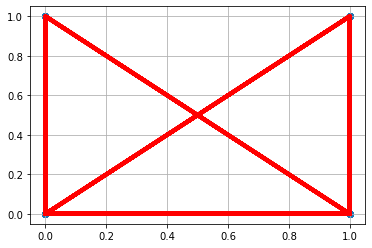

In [45]:
# can not plot all x values as x and y must be same size 
# so compare each differently
y_predicted = model.predict(np.array(train_data))

# Display the result
plt.scatter(np.array(train_data.iloc[:, 0]), np.array(train_labels))
plt.plot(np.array(train_data.iloc[:, 0]), y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()


# TEST2

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                256       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.7274 - accuracy: 0.4400
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7097 - accuracy: 0.4600
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4800
Epoch 4/100
2/2 [============

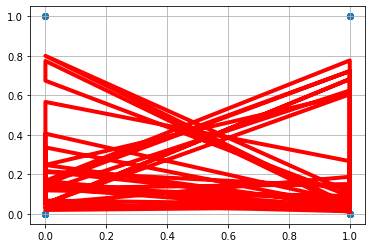

In [50]:
#94%
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data into a pandas DataFrame
data = pd.read_csv("Problem1.csv")
data

#don't take key column
data = data[data.columns[1:9]]
data.head()

# Convert categorical values to numerical values
# true to 1
# false to 0
data["Result"] = data["Result"].apply(lambda x: 1 if x == True else 0)
data["Result"]

#80% of train into 2 splits -> one for the main set, second one for result column label
#20% test -> one for the main set, second one for result column label
train_data, test_data, train_labels, test_labels = train_test_split(data[data.columns[0:7]],data[data.columns[7]] , test_size=0.5, random_state=42)

#create neural network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#7columns so shape 7
model.add(Dense(32, input_shape=(7,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model
model.summary()


#train_data, test_data, train_labels, test_labels
#iteration over training data
#verbose = to display results in this format

#fit the model with train data
model.fit(train_data,train_labels, epochs=100, verbose=1)

# Evaluate the model on the test data
#train_data, test_data, train_labels, test_labels
#need to give test labels for accurancy of the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print("Test accuracy:", test_acc)

# can not plot all x values as x and y must be same size 
# so compare each differently
y_predicted = model.predict(np.array(train_data))

# Display the result
plt.scatter(np.array(train_data.iloc[:, 0]), np.array(train_labels))
plt.plot(np.array(train_data.iloc[:,0]), y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()


# TEST3

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                256       
                                                                 
 dense_36 (Dense)            (None, 64)                2112      
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dense_38 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,817
Trainable params: 10,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/140
3/3 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.8375
Epoch 2/140
3/3 [==============================] - 0s 7ms/step - loss: 0.1201 - accu

3/3 [==============================] - 0s 3ms/step - loss: 9.2644e-05 - accuracy: 1.0000
Epoch 75/140
3/3 [==============================] - 0s 2ms/step - loss: 8.5999e-05 - accuracy: 1.0000
Epoch 76/140
3/3 [==============================] - 0s 5ms/step - loss: 7.5115e-05 - accuracy: 1.0000
Epoch 77/140
3/3 [==============================] - 0s 7ms/step - loss: 6.9622e-05 - accuracy: 1.0000
Epoch 78/140
3/3 [==============================] - 0s 4ms/step - loss: 6.1349e-05 - accuracy: 1.0000
Epoch 79/140
3/3 [==============================] - 0s 4ms/step - loss: 5.5286e-05 - accuracy: 1.0000
Epoch 80/140
3/3 [==============================] - 0s 1ms/step - loss: 5.3679e-05 - accuracy: 1.0000
Epoch 81/140
3/3 [==============================] - 0s 4ms/step - loss: 4.9116e-05 - accuracy: 1.0000
Epoch 82/140
3/3 [==============================] - 0s 6ms/step - loss: 4.5168e-05 - accuracy: 1.0000
Epoch 83/140
3/3 [==============================] - 0s 4ms/step - loss: 4.3185e-05 - accuracy: 

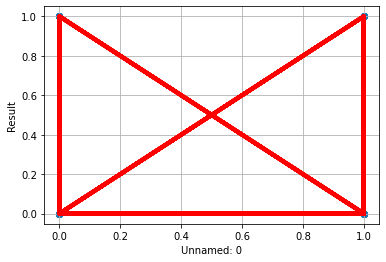

In [55]:
#BEST 100% accuracy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data into a pandas DataFrame
data = pd.read_csv("Problem1.csv")
data

#don't take key column
data = data[data.columns[1:9]]
data.head()

# Convert categorical values to numerical values
# true to 1
# false to 0
data["Result"] = data["Result"].apply(lambda x: 1 if x == True else 0)
data["Result"]

#80% of train into 2 splits -> one for the main set, second one for result column label
#20% test -> one for the main set, second one for result column label
train_data, test_data, train_labels, test_labels = train_test_split(data[data.columns[0:7]],data[data.columns[7]] , test_size=0.2, random_state=42)

#create neural network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#7columns so shape 7
model.add(Dense(32, input_shape=(7,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

# Display the model
model.summary()


#train_data, test_data, train_labels, test_labels
#iteration over training data
#verbose = to display results in this format

#fit the model with train data
model.fit(train_data,train_labels, epochs=140, verbose=1)

# Evaluate the model on the test data
#train_data, test_data, train_labels, test_labels
#need to give test labels for accurancy of the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print("Test accuracy:", test_acc)

# can not plot all x values as x and y must be same size 
# so compare each differently
y_predicted = model.predict(np.array(train_data))

# Display the result
plt.scatter(np.array(train_data.iloc[:, 0]), np.array(train_labels))
plt.plot(np.array(train_data.iloc[:, 0]), y_predicted, 'r', linewidth=4)
plt.xlabel('Unnamed: 0')
plt.ylabel('Result')
plt.grid()
plt.show()
